In [1]:
#Neural Networks Project 2
#Jeremiah Pratt

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

C:\Users\jeremiah.v.pratt\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
LAYER_SIZE = 50
N_HIDDEN_LAYERS = 0
BATCH_SIZE = 75
NUM_BATCHES = 75000
LAMBDA = 0.0001

class Data(object):
    def __init__(self):
        num_samp = 250
        sigma = 0.02
        np.random.seed(31415)

        self.index = np.arange(num_samp*2) 
        self.p1 = np.random.uniform(size=num_samp) + .1
        self.p2 = np.random.uniform(size=num_samp) + .1
        self.x1 = np.cos(4.5*np.pi*self.p1) * self.p1 + \
                  np.random.normal(0,sigma,num_samp)
        self.x2 = np.cos(4.5*np.pi*self.p2 + np.pi) * \
                  self.p2 + np.random.normal(0,sigma,num_samp)
        self.y1 = np.sin(4.5*np.pi*self.p1) * self.p1 + \
                  np.random.normal(0,sigma,num_samp)
        self.y2 = np.sin(4.5*np.pi*self.p2 + np.pi) * \
                  self.p2 + np.random.normal(0,sigma,num_samp)
        
        self.feats1 = np.stack((self.x1,self.y1,
                                np.zeros(np.shape(self.x1))))
        self.feats2 = np.stack((self.x2,self.y2,
                                np.ones(np.shape(self.x2))))
        self.feats = np.concatenate((self.feats1,
                                     self.feats2),axis=1).T
        
    def get_batch(self):
        choices = np.random.choice(self.index, size=BATCH_SIZE)
        return data.feats[choices]

In [3]:
def f(x):
    w0 = tf.get_variable('w0',[2,LAYER_SIZE], 
                         tf.float64, tf.random_normal_initializer())
    b0 = tf.get_variable('b0',[], tf.float64, tf.zeros_initializer())
    w1 = tf.get_variable('w1',[LAYER_SIZE,25], 
                         tf.float64, tf.random_normal_initializer())
    b1 = tf.get_variable('b1',[], tf.float64, tf.zeros_initializer())
    w2 = tf.get_variable('w2',[25,1], 
                         tf.float64, tf.random_normal_initializer())
    b2 = tf.get_variable('b2',[], tf.float64, tf.zeros_initializer)
    
    return tf.squeeze(tf.matmul(tf.nn.elu
                            (tf.squeeze(tf.matmul(tf.nn.elu
                                (tf.squeeze(tf.matmul(x,w0) + b0)),
                                                  w1) + b1)),w2)+b2)

In [4]:
x = tf.placeholder(tf.float64, [None,2])
y = tf.placeholder(tf.float64, [None])
y_hat = f(x)

loss = tf.losses.sigmoid_cross_entropy(y,y_hat) + \
       (LAMBDA*tf.reduce_sum([tf.nn.l2_loss(v)
                              for v in tf.trainable_variables()]))

optim = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

data = Data()

for _ in tqdm(range(0, NUM_BATCHES)):
    batch = data.get_batch()
    x_np = batch[:,0:2]
    y_np = batch[:,2]
    loss_np, _ = sess.run([loss, optim], feed_dict={x: x_np, y: y_np})

100%|███████████████████████████████████████████████████████████████████████████| 75000/75000 [02:13<00:00, 563.63it/s]


In [5]:
def plotPoints():
    plt.scatter(data.x1,data.y1,color='paleturquoise')
    plt.scatter(data.x2,data.y2,color='pink')

In [6]:
def plotContour():
    xt = yt = np.linspace(-1.2,1.2,300)
    xx, yy = np.meshgrid(xt,yt)
    all = np.array(list(zip(xx.flatten(),yy.flatten())))
    
    ret = sess.run(y_hat, feed_dict={x:all})
    pick = sess.run(tf.sigmoid(ret))
    plt.contourf(xx,yy, pick.reshape(xx.shape),cmap='coolwarm')
    plt.contour(xx,yy,pick.reshape(xx.shape),[0.5])

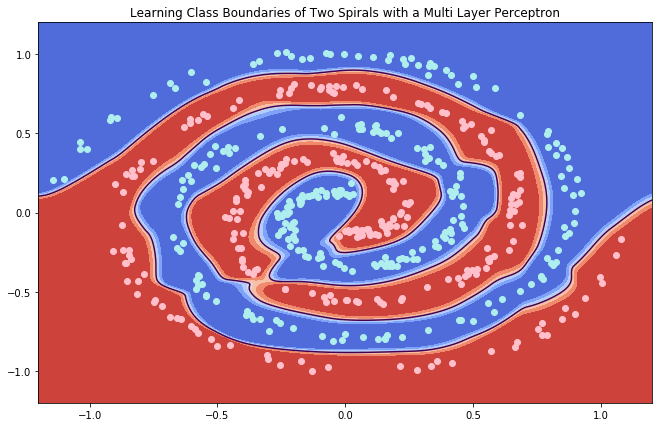

In [7]:
plt.figure(figsize = [11,7])
plt.title('Learning Class Boundaries of Two Spirals with a Multi Layer Perceptron')
plotContour()
plotPoints()
plt.show()